In [1]:
import numpy as np

In [2]:
from keras.utils import to_categorical,np_utils
from keras.models import Sequential,load_model
from keras.layers import Dense, LSTM, Activation,Dropout,Masking, Embedding
from keras import optimizers
from  keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.image as pimg

Using TensorFlow backend.


In [13]:
def loss_plot(self,n_epochs):
    #iters = range(len(self.epoch))
    iters = range(n_epochs)
    plt.figure()
    # acc
    plt.plot(iters, self.history['acc'] [:n_epochs],'r', label='train acc', linewidth=1.0)
    # loss
    plt.plot(iters, self.history['loss'][:n_epochs], 'g', label='train loss', linewidth=1.0)
    
    # val_acc
    plt.plot(iters, self.history['val_acc'][:n_epochs], 'b', label='val acc', linewidth=1.0)
    # val_loss
    plt.plot(iters, self.history['val_loss'][:n_epochs], 'k', label='val loss', linewidth=1.0)
    plt.grid(True)
    plt.ylim(0,1.2)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(loc='best',shadow=True, fontsize='6')#loc="upper right"
    plt.savefig('loss of lstm 01.png', dpi=400)
    sns.plt.show()

In [4]:
zip_data_01=np.load('D:\\GitHub\\Neural-Network-Theory-and-Applications-Homework-SJTU2018\\Homework Assignment 4\\data_used\\01.npz')
files_in_zip_01 = zip_data_01.keys()
label01= np.load('D:\\GitHub\\Neural-Network-Theory-and-Applications-Homework-SJTU2018\\Homework Assignment 4\\data_used\\label.npy')

下一个cell：数据预处理，将01.npz数据集变成（15,265,310）的形式，长度不够265的补零
也就是说，将变长序列变为定长序列，
变形方法：https://stackoverflow.com/questions/35751306/python-how-to-pad-numpy-array-with-zeros 
行为解释：https://www.cnblogs.com/leeshum/p/6089286.html

In [5]:
data01=np.zeros((15,265,310))
for i in range(15):
    for j in range(265):
        if j < zip_data_01[files_in_zip_01[i]].shape[1]:
            data01[i,j,:]=zip_data_01[files_in_zip_01[i]][:,j,:].reshape(310)
        else:
            data01[i,j,:]=np.zeros(310)
data01/=np.max(data01)

In [6]:
x_train=data01[:9,:,:]
x_test=data01[9:,:,:]
y_train=label01[:9]
y_test=label01[9:]
y_train = np_utils.to_categorical(y_train, num_classes=3)
y_test = np_utils.to_categorical(y_test, num_classes=3)

In [7]:
model = Sequential()
    #model.add(Embedding(81250, 128, mask_zero=True))
model.add(Masking(mask_value=0,input_shape=(265, 310)))
model.add(LSTM(128,return_sequences=True))#
#model.add(Activation('relu'))
model.add(LSTM(128))
#model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
RMS = optimizers.RMSprop(lr=1e-5)
model.compile(optimizer=RMS,
      loss='categorical_crossentropy',
      metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 265, 310)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 265, 310)          770040    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               224768    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 1,003,259
Trainable params: 1,003,259
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
# checkpoint
filepath="model-3-best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
earlystop=EarlyStopping(monitor='val_loss', patience=20, verbose=2, mode='auto')

In [ ]:
#load a model
model=load_model('D:/GitHub/Neural-Network-Theory-and-Applications-Homework-SJTU2018/Homework Assignment 4/model-3-best.hdf5')
print(model.summary())

In [9]:
print('Training ------------')
model_history=model.fit(x_train, y_train,
          validation_data=(x_test,y_test),epochs=300,verbose=2,
          batch_size=9,callbacks=[checkpoint])

Training ------------
Train on 9 samples, validate on 6 samples
Epoch 1/600
Epoch 00001: val_loss improved from inf to 1.11676, saving model to model-3-best.hdf5
 - 6s - loss: 1.1321 - acc: 0.5556 - val_loss: 1.1168 - val_acc: 0.3333
Epoch 2/600
Epoch 00002: val_loss improved from 1.11676 to 1.09272, saving model to model-3-best.hdf5
 - 3s - loss: 1.1041 - acc: 0.4444 - val_loss: 1.0927 - val_acc: 0.5000
Epoch 3/600
Epoch 00003: val_loss improved from 1.09272 to 1.08368, saving model to model-3-best.hdf5
 - 3s - loss: 1.0899 - acc: 0.4444 - val_loss: 1.0837 - val_acc: 0.5000
Epoch 4/600
Epoch 00004: val_loss improved from 1.08368 to 1.07328, saving model to model-3-best.hdf5
 - 3s - loss: 1.0795 - acc: 0.5556 - val_loss: 1.0733 - val_acc: 0.5000
Epoch 5/600
Epoch 00005: val_loss improved from 1.07328 to 1.06056, saving model to model-3-best.hdf5
 - 3s - loss: 1.0722 - acc: 0.5556 - val_loss: 1.0606 - val_acc: 0.5000
Epoch 6/600
Epoch 00006: val_loss improved from 1.06056 to 1.05324, sa

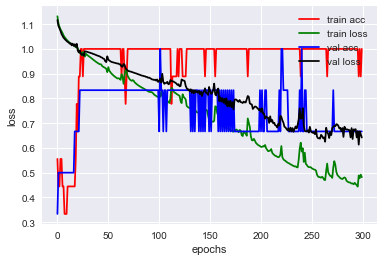

In [14]:
loss_plot(model_history)